# <div style="color: orange; font-size: 36px; text-align: center"><b >Amazon Delivery Dataset</b></div>

> | Features | Description | Type |
> | ------- | ------- | ------- |
> | Order_ID | Unique value for each order | string |
> | Agent_Age | Age of agent | integer |
> | Agent_Rating | Rating of agent | float |
> | Store_Latitude | Store latitude | float |
> | Store_Longitude | Store longitude | float |
> | Drop_Latitude | Drop latitude | float |
> | Drop_Longitude | Drop longitude | float |
> | Order_Date | Date of order creation | DateTime |
> | Order_Time | Time of order creation | DateTime |
> | Pickup_Time | Time of order pickup for delivery | DateTime |
> | Weather | Weather during delivery process | string |
> | Traffic | Traffic during delivery process | string |
> | Vehicle | Vehicle used during delivery process | string |
> | Area | Area of delivery | string |
> | Delivery_Time | Time for delivery in minutes | integer |
> | Category | Category of ordered item | string |

> <div style="color: darkred; font-size: 16px; text-align: center">Size: 43739 × 16</div>

> [Link of dataset on kaggle](https://www.kaggle.com/datasets/sujalsuthar/amazon-delivery-dataset)

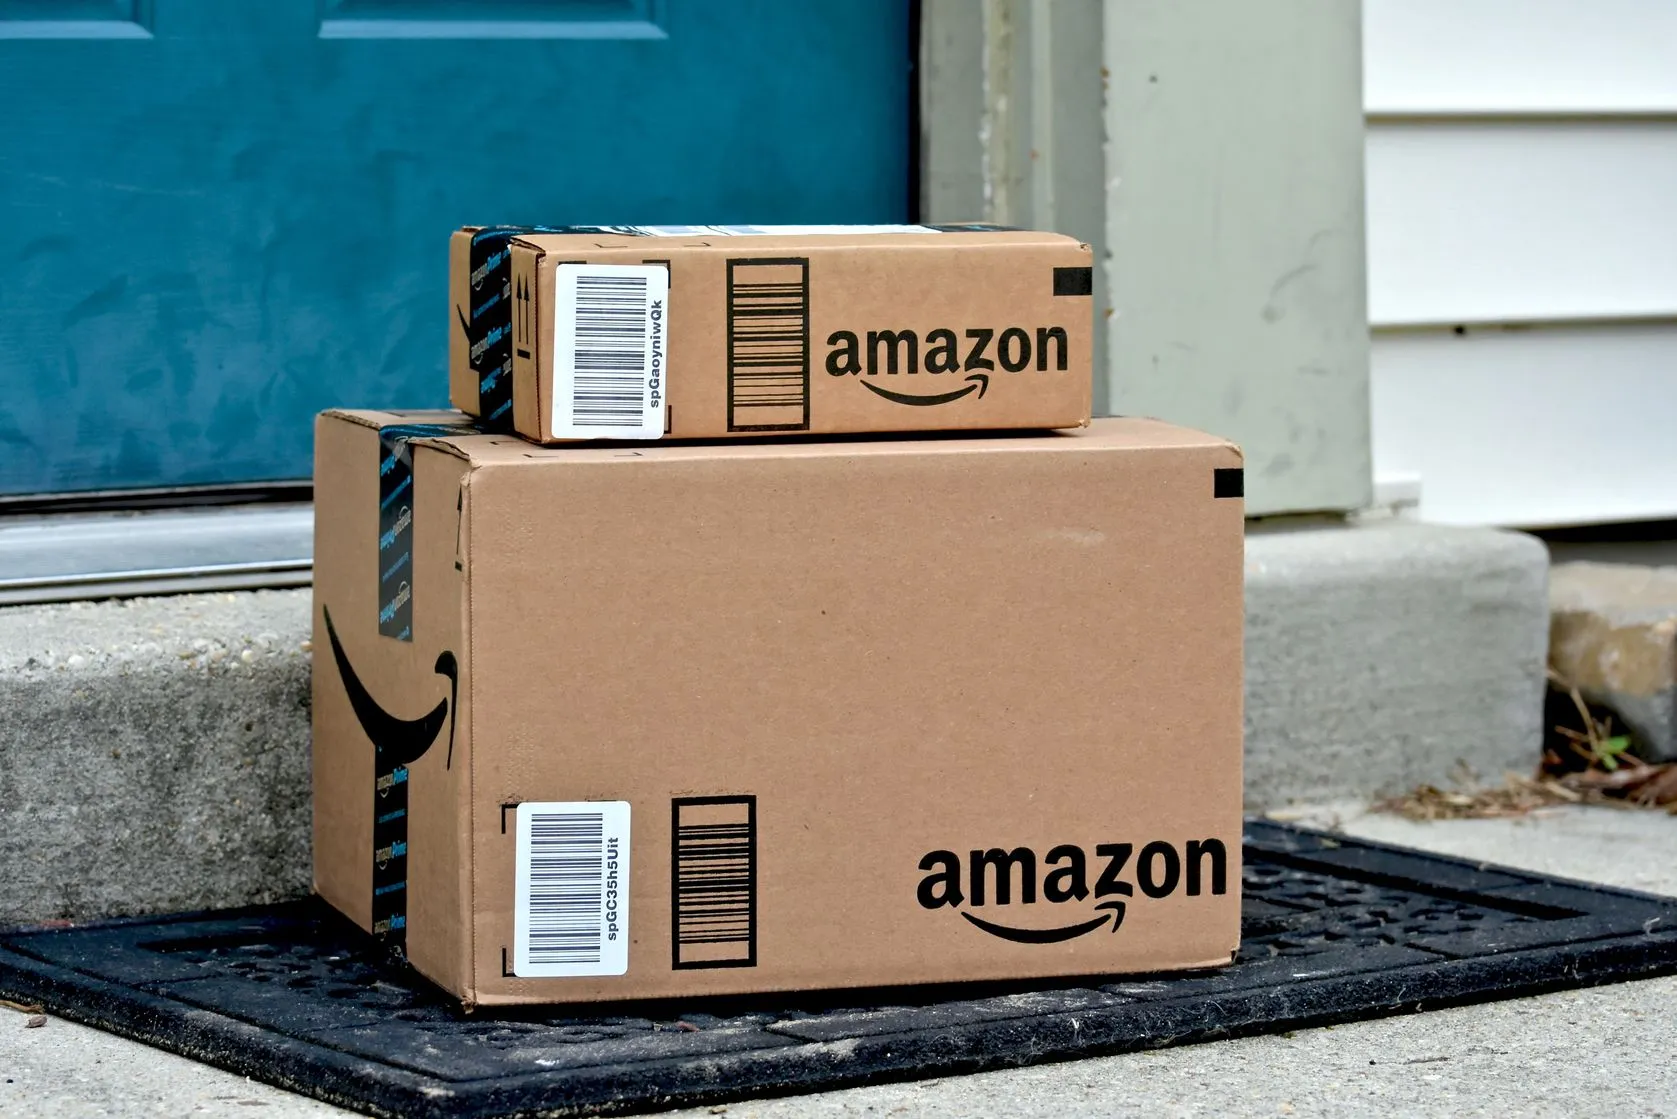

## <div style="color: lightgreen; font-size: 30; text-align: center"><b >Importing libraries and loading data</b></div>

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm.notebook import tqdm
from geopy.geocoders import Nominatim
from geopy.distance import great_circle
import threading
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
from shapely.geometry import Point
import os
import plotly.io as pio
tqdm.pandas(colour='maroon')

In [7]:
df = pd.read_csv('../Amazon Delivery Dataset/amazon_delivery.csv')

## <div style="color: green; font-size: 30px; text-align: center"><b>Univariate Analyses</b ></div>

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Preparing Data</b ></div>

In [8]:
df.sample(4, random_state=0)

Order_ID  Agent_Age  Agent_Rating  Store_Latitude  \
17967  owxt130637594         31           4.9       22.310237   
18168  jdnh730445109         22           4.7       18.533811   
25990  wibc288213424         32           4.6       26.902940   
3153   wwiz346522056         37           4.0       30.892978   

       Store_Longitude  Drop_Latitude  Drop_Longitude  Order_Date Order_Time  \
17967        73.158921      22.330237       73.178921  2022-04-03   09:35:00   
18168        73.899315      18.583811       73.949315  2022-03-07   18:15:00   
25990        75.793007      27.042940       75.933007  2022-03-08   17:25:00   
3153         75.821847      30.962978       75.891847  2022-02-18   19:45:00   

      Pickup_Time Weather  Traffic   Vehicle            Area  Delivery_Time  \
17967    09:50:00   Windy     Low   scooter   Metropolitian              25   
18168    18:25:00   Sunny  Medium   scooter   Metropolitian              85   
25990    17:35:00   Windy  Medium   scooter   Metropolitian             125   
3153     20:00:00  Cloudy     Jam   scooter           Urban             190   

      Category  
17967  Grocery  
18168     Toys  
25990  Kitchen  
3153      Toys

In [9]:
ff.create_table(df.describe().reset_index().rename({'index': 'Calculated value'}, axis = 1))

In [10]:
ff.create_table(df.select_dtypes('O').describe().reset_index().rename({'index': 'Calculated value'}, axis = 1))

In [11]:
ff.create_table(df.mode().loc[0].drop(['Order_ID']).to_frame().reset_index().rename({'index':'Column name', 0:'Mode'}, axis = 1))

In [12]:
ff.create_table((df.isnull().mean()*100).to_frame().reset_index().rename({0:'Percentage of null values', 'index':'Column name'} ,axis = 1))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df['Order_ID'].duplicated().sum()

np.int64(0)

In [16]:
ff.create_table(df.dtypes.to_frame().reset_index().rename({'index': 'Column name', 0: 'Data type'}, axis = 1))

In [17]:
for columnName in df.select_dtypes('O').columns[1:]:
    print(columnName+':')
    display(df[columnName].unique())
    print('\n'+'-'*120+'\n')

Order_Date:


array(['2022-03-19', '2022-03-25', '2022-04-05', '2022-03-26',
       '2022-03-11', '2022-03-04', '2022-03-14', '2022-03-20',
       '2022-02-12', '2022-02-13', '2022-02-14', '2022-04-02',
       '2022-03-01', '2022-03-16', '2022-02-15', '2022-03-10',
       '2022-03-27', '2022-03-12', '2022-04-01', '2022-03-05',
       '2022-02-11', '2022-03-08', '2022-04-03', '2022-03-30',
       '2022-03-28', '2022-03-18', '2022-04-04', '2022-03-24',
       '2022-03-09', '2022-03-02', '2022-03-13', '2022-03-29',
       '2022-03-31', '2022-03-17', '2022-03-07', '2022-03-15',
       '2022-02-16', '2022-03-03', '2022-02-18', '2022-03-23',
       '2022-02-17', '2022-03-06', '2022-03-21', '2022-04-06'],
      dtype=object)


------------------------------------------------------------------------------------------------------------------------

Order_Time:


array(['11:30:00', '19:45:00', '08:30:00', '18:00:00', '13:30:00',
       '21:20:00', '19:15:00', '17:25:00', '20:55:00', '21:55:00',
       '14:55:00', '17:30:00', '09:20:00', '19:50:00', '20:25:00',
       '20:30:00', '20:40:00', '21:15:00', '20:20:00', '22:30:00',
       '08:15:00', '19:30:00', '12:25:00', '18:35:00', '20:35:00',
       '23:20:00', '23:35:00', '22:35:00', '23:25:00', '13:35:00',
       '21:35:00', '18:55:00', '14:15:00', '11:00:00', '09:45:00',
       '08:40:00', '23:00:00', '19:10:00', '10:55:00', '21:40:00',
       '19:00:00', '16:45:00', '15:10:00', '22:45:00', '22:10:00',
       '20:45:00', '22:50:00', '17:55:00', '09:25:00', '20:15:00',
       '22:25:00', '22:40:00', '23:50:00', '15:25:00', '10:20:00',
       '10:40:00', '15:55:00', '20:10:00', '12:10:00', '15:30:00',
       '10:35:00', '21:10:00', '20:50:00', '12:35:00', '21:00:00',
       '23:40:00', '18:15:00', '18:20:00', '11:45:00', '12:45:00',
       '23:30:00', '10:50:00', '21:25:00', '10:10:00', '17:50:


------------------------------------------------------------------------------------------------------------------------

Pickup_Time:


array(['11:45:00', '19:50:00', '08:45:00', '18:10:00', '13:45:00',
       '21:30:00', '19:30:00', '17:30:00', '21:05:00', '22:10:00',
       '15:05:00', '17:40:00', '09:30:00', '20:05:00', '20:35:00',
       '15:10:00', '20:40:00', '20:50:00', '20:25:00', '22:45:00',
       '08:30:00', '19:45:00', '12:30:00', '18:50:00', '23:30:00',
       '21:35:00', '23:45:00', '22:50:00', '22:40:00', '23:35:00',
       '13:40:00', '21:45:00', '19:10:00', '14:25:00', '11:10:00',
       '09:55:00', '08:55:00', '23:10:00', '19:25:00', '11:00:00',
       '19:15:00', '16:55:00', '11:40:00', '15:15:00', '22:55:00',
       '22:25:00', '20:55:00', '23:05:00', '18:00:00', '23:00:00',
       '09:40:00', '20:20:00', '22:35:00', '22:00:00', '23:55:00',
       '15:40:00', '10:30:00', '21:00:00', '10:50:00', '16:05:00',
       '20:15:00', '12:15:00', '15:45:00', '22:15:00', '10:45:00',
       '00:05:00', '21:25:00', '12:45:00', '21:15:00', '18:20:00',
       '18:25:00', '11:50:00', '12:50:00', '10:55:00', '21:40:


------------------------------------------------------------------------------------------------------------------------

Weather:


array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan],
      dtype=object)


------------------------------------------------------------------------------------------------------------------------

Traffic:


array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)


------------------------------------------------------------------------------------------------------------------------

Vehicle:


array(['motorcycle ', 'scooter ', 'van', 'bicycle '], dtype=object)


------------------------------------------------------------------------------------------------------------------------

Area:


array(['Urban ', 'Metropolitian ', 'Semi-Urban ', 'Other'], dtype=object)


------------------------------------------------------------------------------------------------------------------------

Category:


array(['Clothing', 'Electronics', 'Sports', 'Cosmetics', 'Toys', 'Snacks',
       'Shoes', 'Apparel', 'Jewelry', 'Outdoors', 'Grocery', 'Books',
       'Kitchen', 'Home', 'Pet Supplies', 'Skincare'], dtype=object)


------------------------------------------------------------------------------------------------------------------------



In [18]:
for columnName in df.select_dtypes('O').columns[1:]: # converting NaN as string and striping other strings
    print(columnName)
    df[columnName] = df[columnName].progress_apply(lambda x: (np.nan if 'nan' in x.casefold() else x.strip()) if isinstance(x, str) else x)

Order_Date


  0%|          | 0/43739 [00:00<?, ?it/s]

Order_Time


  0%|          | 0/43739 [00:00<?, ?it/s]

Pickup_Time


  0%|          | 0/43739 [00:00<?, ?it/s]

Weather


  0%|          | 0/43739 [00:00<?, ?it/s]

Traffic


  0%|          | 0/43739 [00:00<?, ?it/s]

Vehicle


  0%|          | 0/43739 [00:00<?, ?it/s]

Area


  0%|          | 0/43739 [00:00<?, ?it/s]

Category


  0%|          | 0/43739 [00:00<?, ?it/s]

In [19]:
df = df.convert_dtypes() # converting the data types

In [20]:
ff.create_table((df.isnull().mean()*100).to_frame().reset_index().rename({0:'Percentage of null values', 'index':'Column name'} ,axis = 1))

In [21]:
df_temp = df.sort_values(['Order_Date', 'Pickup_Time'], ignore_index=True)

In [22]:
indexes_na = df_temp[df_temp.Order_Time.isnull()].index

In [23]:
df_temp.loc[indexes_na[0]-2:indexes_na[0]+2]

Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
1116  wbvt468192454         27           4.9        9.985697        76.281128   
1117  vkdn227549935         22           4.6       25.450329        81.834279   
1118  eeyk326024665         50           6.0       26.482581        80.315628   
1119  fmww513959870         26           4.6       23.232537        77.429845   
1120  qblf150850545         27           4.7       22.538999        88.322337   

      Drop_Latitude  Drop_Longitude  Order_Date Order_Time Pickup_Time  \
1116      10.055697       76.351128  2022-02-12   18:20:00    18:30:00   
1117      25.530329       81.914279  2022-02-12   18:20:00    18:30:00   
1118      26.612581       80.445628  2022-02-12       <NA>    18:30:00   
1119      23.362537       77.559845  2022-02-12   18:20:00    18:30:00   
1120      22.648999       88.432337  2022-02-12   18:20:00    18:30:00   

     Weather Traffic     Vehicle           Area  Delivery_Time      Category  
1116  Stormy  Medium  motorcycle  Metropolitian             90   Electronics  
1117     Fog  Medium  motorcycle  Metropolitian            170        Sports  
1118    <NA>    <NA>     scooter  Metropolitian            205          Toys  
1119   Windy  Medium     scooter          Urban             85        Snacks  
1120  Stormy  Medium     scooter  Metropolitian             80  Pet Supplies

In [24]:
df_temp[(df_temp.Order_Time.isnull()) & (df_temp.Weather.isnull()) & (df_temp.Traffic.isnull())].shape[0]/df_temp.shape[0]*100

0.20805231029515994

In [25]:
df.dropna(subset=['Order_Time', 'Agent_Rating'], inplace=True)

In [26]:
del df_temp

In [27]:
df['Order_Date_Time'] = pd.to_datetime(df.Order_Date + ' ' + df.Order_Time, format="%Y-%m-%d %H:%M:%S")

In [28]:
df['Pickup_Time'] = pd.to_datetime(df.Pickup_Time, format="%H:%M:%S").dt.time

In [29]:
df.drop(['Order_Date', 'Order_Time'], axis=1, inplace=True)

In [30]:
ff.create_table(df.dtypes.to_frame().reset_index().rename({'index': 'Column name', 0: 'Data type'}, axis = 1))

In [31]:
df.to_csv('../Amazon Delivery Dataset/amazon_delivery_cleaned.csv', index=False)

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 1st feature (Order_ID)</b ></div>

In [32]:
df.Order_ID.str.len().unique() # Checks if the length of IDs is all equivalent

<IntegerArray>
[13]
Length: 1, dtype: Int64

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 2nd feature (Agent_Age)</b ></div>

In [35]:
px.histogram(data_frame=df.astype('string'), x='Agent_Age', text_auto=True, title='Number of agents per each Age', template='plotly_dark', color_discrete_sequence=['maroon']).update_layout(yaxis_title='Number of Agents', xaxis_title='Age', xaxis={'categoryorder': 'total descending'})

ValueError: Invalid property specified for object of type plotly.graph_objs.layout.XAxis: 'cader'

Did you mean "layer"?

    Valid properties:
        anchor
            If set to an opposite-letter axis id (e.g. `x2`, `y`),
            this axis is bound to the corresponding opposite-letter
            axis. If set to "free", this axis' position is
            determined by `position`.
        automargin
            Determines whether long tick labels automatically grow
            the figure margins.
        autorange
            Determines whether or not the range of this axis is
            computed in relation to the input data. See `rangemode`
            for more info. If `range` is provided and it has a
            value for both the lower and upper bound, `autorange`
            is set to False. Using "min" applies autorange only to
            set the minimum. Using "max" applies autorange only to
            set the maximum. Using *min reversed* applies autorange
            only to set the minimum on a reversed axis. Using *max
            reversed* applies autorange only to set the maximum on
            a reversed axis. Using "reversed" applies autorange on
            both ends and reverses the axis direction.
        autorangeoptions
            :class:`plotly.graph_objects.layout.xaxis.Autorangeopti
            ons` instance or dict with compatible properties
        autotickangles
            When `tickangle` is set to "auto", it will be set to
            the first angle in this array that is large enough to
            prevent label overlap.
        autotypenumbers
            Using "strict" a numeric string in trace data is not
            converted to a number. Using *convert types* a numeric
            string in trace data may be treated as a number during
            automatic axis `type` detection. Defaults to
            layout.autotypenumbers.
        calendar
            Sets the calendar system to use for `range` and `tick0`
            if this is a date axis. This does not set the calendar
            for interpreting data on this axis, that's specified in
            the trace or via the global `layout.calendar`
        categoryarray
            Sets the order in which categories on this axis appear.
            Only has an effect if `categoryorder` is set to
            "array". Used with `categoryorder`.
        categoryarraysrc
            Sets the source reference on Chart Studio Cloud for
            `categoryarray`.
        categoryorder
            Specifies the ordering logic for the case of
            categorical variables. By default, plotly uses "trace",
            which specifies the order that is present in the data
            supplied. Set `categoryorder` to *category ascending*
            or *category descending* if order should be determined
            by the alphanumerical order of the category names. Set
            `categoryorder` to "array" to derive the ordering from
            the attribute `categoryarray`. If a category is not
            found in the `categoryarray` array, the sorting
            behavior for that attribute will be identical to the
            "trace" mode. The unspecified categories will follow
            the categories in `categoryarray`. Set `categoryorder`
            to *total ascending* or *total descending* if order
            should be determined by the numerical order of the
            values. Similarly, the order can be determined by the
            min, max, sum, mean, geometric mean or median of all
            the values.
        color
            Sets default for all colors associated with this axis
            all at once: line, font, tick, and grid colors. Grid
            color is lightened by blending this with the plot
            background Individual pieces can override this.
        constrain
            If this axis needs to be compressed (either due to its
            own `scaleanchor` and `scaleratio` or those of the
            other axis), determines how that happens: by increasing
            the "range", or by decreasing the "domain". Default is
            "domain" for axes containing image traces, "range"
            otherwise.
        constraintoward
            If this axis needs to be compressed (either due to its
            own `scaleanchor` and `scaleratio` or those of the
            other axis), determines which direction we push the
            originally specified plot area. Options are "left",
            "center" (default), and "right" for x axes, and "top",
            "middle" (default), and "bottom" for y axes.
        dividercolor
            Sets the color of the dividers Only has an effect on
            "multicategory" axes.
        dividerwidth
            Sets the width (in px) of the dividers Only has an
            effect on "multicategory" axes.
        domain
            Sets the domain of this axis (in plot fraction).
        dtick
            Sets the step in-between ticks on this axis. Use with
            `tick0`. Must be a positive number, or special strings
            available to "log" and "date" axes. If the axis `type`
            is "log", then ticks are set every 10^(n*dtick) where n
            is the tick number. For example, to set a tick mark at
            1, 10, 100, 1000, ... set dtick to 1. To set tick marks
            at 1, 100, 10000, ... set dtick to 2. To set tick marks
            at 1, 5, 25, 125, 625, 3125, ... set dtick to
            log_10(5), or 0.69897000433. "log" has several special
            values; "L<f>", where `f` is a positive number, gives
            ticks linearly spaced in value (but not position). For
            example `tick0` = 0.1, `dtick` = "L0.5" will put ticks
            at 0.1, 0.6, 1.1, 1.6 etc. To show powers of 10 plus
            small digits between, use "D1" (all digits) or "D2"
            (only 2 and 5). `tick0` is ignored for "D1" and "D2".
            If the axis `type` is "date", then you must convert the
            time to milliseconds. For example, to set the interval
            between ticks to one day, set `dtick` to 86400000.0.
            "date" also has special values "M<n>" gives ticks
            spaced by a number of months. `n` must be a positive
            integer. To set ticks on the 15th of every third month,
            set `tick0` to "2000-01-15" and `dtick` to "M3". To set
            ticks every 4 years, set `dtick` to "M48"
        exponentformat
            Determines a formatting rule for the tick exponents.
            For example, consider the number 1,000,000,000. If
            "none", it appears as 1,000,000,000. If "e", 1e+9. If
            "E", 1E+9. If "power", 1x10^9 (with 9 in a super
            script). If "SI", 1G. If "B", 1B.
        fixedrange
            Determines whether or not this axis is zoom-able. If
            true, then zoom is disabled.
        gridcolor
            Sets the color of the grid lines.
        griddash
            Sets the dash style of lines. Set to a dash type string
            ("solid", "dot", "dash", "longdash", "dashdot", or
            "longdashdot") or a dash length list in px (eg
            "5px,10px,2px,2px").
        gridwidth
            Sets the width (in px) of the grid lines.
        hoverformat
            Sets the hover text formatting rule using d3 formatting
            mini-languages which are very similar to those in
            Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display "09~15~23.46"
        insiderange
            Could be used to set the desired inside range of this
            axis (excluding the labels) when `ticklabelposition` of
            the anchored axis has "inside". Not implemented for
            axes with `type` "log". This would be ignored when
            `range` is provided.
        labelalias
            Replacement text for specific tick or hover labels. For
            example using {US: 'USA', CA: 'Canada'} changes US to
            USA and CA to Canada. The labels we would have shown
            must match the keys exactly, after adding any
            tickprefix or ticksuffix. For negative numbers the
            minus sign symbol used (U+2212) is wider than the
            regular ascii dash. That means you need to use −1
            instead of -1. labelalias can be used with any axis
            type, and both keys (if needed) and values (if desired)
            can include html-like tags or MathJax.
        layer
            Sets the layer on which this axis is displayed. If
            *above traces*, this axis is displayed above all the
            subplot's traces If *below traces*, this axis is
            displayed below all the subplot's traces, but above the
            grid lines. Useful when used together with scatter-like
            traces with `cliponaxis` set to False to show markers
            and/or text nodes above this axis.
        linecolor
            Sets the axis line color.
        linewidth
            Sets the width (in px) of the axis line.
        matches
            If set to another axis id (e.g. `x2`, `y`), the range
            of this axis will match the range of the corresponding
            axis in data-coordinates space. Moreover, matching axes
            share auto-range values, category lists and histogram
            auto-bins. Note that setting axes simultaneously in
            both a `scaleanchor` and a `matches` constraint is
            currently forbidden. Moreover, note that matching axes
            must have the same `type`.
        maxallowed
            Determines the maximum range of this axis.
        minallowed
            Determines the minimum range of this axis.
        minexponent
            Hide SI prefix for 10^n if |n| is below this number.
            This only has an effect when `tickformat` is "SI" or
            "B".
        minor
            :class:`plotly.graph_objects.layout.xaxis.Minor`
            instance or dict with compatible properties
        mirror
            Determines if the axis lines or/and ticks are mirrored
            to the opposite side of the plotting area. If True, the
            axis lines are mirrored. If "ticks", the axis lines and
            ticks are mirrored. If False, mirroring is disable. If
            "all", axis lines are mirrored on all shared-axes
            subplots. If "allticks", axis lines and ticks are
            mirrored on all shared-axes subplots.
        nticks
            Specifies the maximum number of ticks for the
            particular axis. The actual number of ticks will be
            chosen automatically to be less than or equal to
            `nticks`. Has an effect only if `tickmode` is set to
            "auto".
        overlaying
            If set a same-letter axis id, this axis is overlaid on
            top of the corresponding same-letter axis, with traces
            and axes visible for both axes. If False, this axis
            does not overlay any same-letter axes. In this case,
            for axes with overlapping domains only the highest-
            numbered axis will be visible.
        position
            Sets the position of this axis in the plotting space
            (in normalized coordinates). Only has an effect if
            `anchor` is set to "free".
        range
            Sets the range of this axis. If the axis `type` is
            "log", then you must take the log of your desired range
            (e.g. to set the range from 1 to 100, set the range
            from 0 to 2). If the axis `type` is "date", it should
            be date strings, like date data, though Date objects
            and unix milliseconds will be accepted and converted to
            strings. If the axis `type` is "category", it should be
            numbers, using the scale where each category is
            assigned a serial number from zero in the order it
            appears. Leaving either or both elements `null` impacts
            the default `autorange`.
        rangebreaks
            A tuple of
            :class:`plotly.graph_objects.layout.xaxis.Rangebreak`
            instances or dicts with compatible properties
        rangebreakdefaults
            When used in a template (as
            layout.template.layout.xaxis.rangebreakdefaults), sets
            the default property values to use for elements of
            layout.xaxis.rangebreaks
        rangemode
            If "normal", the range is computed in relation to the
            extrema of the input data. If *tozero*`, the range
            extends to 0, regardless of the input data If
            "nonnegative", the range is non-negative, regardless of
            the input data. Applies only to linear axes.
        rangeselector
            :class:`plotly.graph_objects.layout.xaxis.Rangeselector
            ` instance or dict with compatible properties
        rangeslider
            :class:`plotly.graph_objects.layout.xaxis.Rangeslider`
            instance or dict with compatible properties
        scaleanchor
            If set to another axis id (e.g. `x2`, `y`), the range
            of this axis changes together with the range of the
            corresponding axis such that the scale of pixels per
            unit is in a constant ratio. Both axes are still
            zoomable, but when you zoom one, the other will zoom
            the same amount, keeping a fixed midpoint. `constrain`
            and `constraintoward` determine how we enforce the
            constraint. You can chain these, ie `yaxis:
            {scaleanchor: *x*}, xaxis2: {scaleanchor: *y*}` but you
            can only link axes of the same `type`. The linked axis
            can have the opposite letter (to constrain the aspect
            ratio) or the same letter (to match scales across
            subplots). Loops (`yaxis: {scaleanchor: *x*}, xaxis:
            {scaleanchor: *y*}` or longer) are redundant and the
            last constraint encountered will be ignored to avoid
            possible inconsistent constraints via `scaleratio`.
            Note that setting axes simultaneously in both a
            `scaleanchor` and a `matches` constraint is currently
            forbidden. Setting `false` allows to remove a default
            constraint (occasionally, you may need to prevent a
            default `scaleanchor` constraint from being applied,
            eg. when having an image trace `yaxis: {scaleanchor:
            "x"}` is set automatically in order for pixels to be
            rendered as squares, setting `yaxis: {scaleanchor:
            false}` allows to remove the constraint).
        scaleratio
            If this axis is linked to another by `scaleanchor`,
            this determines the pixel to unit scale ratio. For
            example, if this value is 10, then every unit on this
            axis spans 10 times the number of pixels as a unit on
            the linked axis. Use this for example to create an
            elevation profile where the vertical scale is
            exaggerated a fixed amount with respect to the
            horizontal.
        separatethousands
            If "true", even 4-digit integers are separated
        showdividers
            Determines whether or not a dividers are drawn between
            the category levels of this axis. Only has an effect on
            "multicategory" axes.
        showexponent
            If "all", all exponents are shown besides their
            significands. If "first", only the exponent of the
            first tick is shown. If "last", only the exponent of
            the last tick is shown. If "none", no exponents appear.
        showgrid
            Determines whether or not grid lines are drawn. If
            True, the grid lines are drawn at every tick mark.
        showline
            Determines whether or not a line bounding this axis is
            drawn.
        showspikes
            Determines whether or not spikes (aka droplines) are
            drawn for this axis. Note: This only takes affect when
            hovermode = closest
        showticklabels
            Determines whether or not the tick labels are drawn.
        showtickprefix
            If "all", all tick labels are displayed with a prefix.
            If "first", only the first tick is displayed with a
            prefix. If "last", only the last tick is displayed with
            a suffix. If "none", tick prefixes are hidden.
        showticksuffix
            Same as `showtickprefix` but for tick suffixes.
        side
            Determines whether a x (y) axis is positioned at the
            "bottom" ("left") or "top" ("right") of the plotting
            area.
        spikecolor
            Sets the spike color. If undefined, will use the series
            color
        spikedash
            Sets the dash style of lines. Set to a dash type string
            ("solid", "dot", "dash", "longdash", "dashdot", or
            "longdashdot") or a dash length list in px (eg
            "5px,10px,2px,2px").
        spikemode
            Determines the drawing mode for the spike line If
            "toaxis", the line is drawn from the data point to the
            axis the  series is plotted on. If "across", the line
            is drawn across the entire plot area, and supercedes
            "toaxis". If "marker", then a marker dot is drawn on
            the axis the series is plotted on
        spikesnap
            Determines whether spikelines are stuck to the cursor
            or to the closest datapoints.
        spikethickness
            Sets the width (in px) of the zero line.
        tick0
            Sets the placement of the first tick on this axis. Use
            with `dtick`. If the axis `type` is "log", then you
            must take the log of your starting tick (e.g. to set
            the starting tick to 100, set the `tick0` to 2) except
            when `dtick`=*L<f>* (see `dtick` for more info). If the
            axis `type` is "date", it should be a date string, like
            date data. If the axis `type` is "category", it should
            be a number, using the scale where each category is
            assigned a serial number from zero in the order it
            appears.
        tickangle
            Sets the angle of the tick labels with respect to the
            horizontal. For example, a `tickangle` of -90 draws the
            tick labels vertically.
        tickcolor
            Sets the tick color.
        tickfont
            Sets the tick font.
        tickformat
            Sets the tick label formatting rule using d3 formatting
            mini-languages which are very similar to those in
            Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display "09~15~23.46"
        tickformatstops
            A tuple of :class:`plotly.graph_objects.layout.xaxis.Ti
            ckformatstop` instances or dicts with compatible
            properties
        tickformatstopdefaults
            When used in a template (as
            layout.template.layout.xaxis.tickformatstopdefaults),
            sets the default property values to use for elements of
            layout.xaxis.tickformatstops
        ticklabelindex
            Only for axes with `type` "date" or "linear". Instead
            of drawing the major tick label, draw the label for the
            minor tick that is n positions away from the major
            tick. E.g. to always draw the label for the minor tick
            before each major tick, choose `ticklabelindex` -1.
            This is useful for date axes with `ticklabelmode`
            "period" if you want to label the period that ends with
            each major tick instead of the period that begins
            there.
        ticklabelindexsrc
            Sets the source reference on Chart Studio Cloud for
            `ticklabelindex`.
        ticklabelmode
            Determines where tick labels are drawn with respect to
            their corresponding ticks and grid lines. Only has an
            effect for axes of `type` "date" When set to "period",
            tick labels are drawn in the middle of the period
            between ticks.
        ticklabeloverflow
            Determines how we handle tick labels that would
            overflow either the graph div or the domain of the
            axis. The default value for inside tick labels is *hide
            past domain*. Otherwise on "category" and
            "multicategory" axes the default is "allow". In other
            cases the default is *hide past div*.
        ticklabelposition
            Determines where tick labels are drawn with respect to
            the axis Please note that top or bottom has no effect
            on x axes or when `ticklabelmode` is set to "period".
            Similarly left or right has no effect on y axes or when
            `ticklabelmode` is set to "period". Has no effect on
            "multicategory" axes or when `tickson` is set to
            "boundaries". When used on axes linked by `matches` or
            `scaleanchor`, no extra padding for inside labels would
            be added by autorange, so that the scales could match.
        ticklabelshift
            Shifts the tick labels by the specified number of
            pixels in parallel to the axis. Positive values move
            the labels in the positive direction of the axis.
        ticklabelstandoff
            Sets the standoff distance (in px) between the axis
            tick labels and their default position. A positive
            `ticklabelstandoff` moves the labels farther away from
            the plot area if `ticklabelposition` is "outside", and
            deeper into the plot area if `ticklabelposition` is
            "inside". A negative `ticklabelstandoff` works in the
            opposite direction, moving outside ticks towards the
            plot area and inside ticks towards the outside. If the
            negative value is large enough, inside ticks can even
            end up outside and vice versa.
        ticklabelstep
            Sets the spacing between tick labels as compared to the
            spacing between ticks. A value of 1 (default) means
            each tick gets a label. A value of 2 means shows every
            2nd label. A larger value n means only every nth tick
            is labeled. `tick0` determines which labels are shown.
            Not implemented for axes with `type` "log" or
            "multicategory", or when `tickmode` is "array".
        ticklen
            Sets the tick length (in px).
        tickmode
            Sets the tick mode for this axis. If "auto", the number
            of ticks is set via `nticks`. If "linear", the
            placement of the ticks is determined by a starting
            position `tick0` and a tick step `dtick` ("linear" is
            the default value if `tick0` and `dtick` are provided).
            If "array", the placement of the ticks is set via
            `tickvals` and the tick text is `ticktext`. ("array" is
            the default value if `tickvals` is provided). If
            "sync", the number of ticks will sync with the
            overlayed axis set by `overlaying` property.
        tickprefix
            Sets a tick label prefix.
        ticks
            Determines whether ticks are drawn or not. If "", this
            axis' ticks are not drawn. If "outside" ("inside"),
            this axis' are drawn outside (inside) the axis lines.
        tickson
            Determines where ticks and grid lines are drawn with
            respect to their corresponding tick labels. Only has an
            effect for axes of `type` "category" or
            "multicategory". When set to "boundaries", ticks and
            grid lines are drawn half a category to the left/bottom
            of labels.
        ticksuffix
            Sets a tick label suffix.
        ticktext
            Sets the text displayed at the ticks position via
            `tickvals`. Only has an effect if `tickmode` is set to
            "array". Used with `tickvals`.
        ticktextsrc
            Sets the source reference on Chart Studio Cloud for
            `ticktext`.
        tickvals
            Sets the values at which ticks on this axis appear.
            Only has an effect if `tickmode` is set to "array".
            Used with `ticktext`.
        tickvalssrc
            Sets the source reference on Chart Studio Cloud for
            `tickvals`.
        tickwidth
            Sets the tick width (in px).
        title
            :class:`plotly.graph_objects.layout.xaxis.Title`
            instance or dict with compatible properties
        titlefont
            Deprecated: Please use layout.xaxis.title.font instead.
            Sets this axis' title font. Note that the title's font
            used to be customized by the now deprecated `titlefont`
            attribute.
        type
            Sets the axis type. By default, plotly attempts to
            determined the axis type by looking into the data of
            the traces that referenced the axis in question.
        uirevision
            Controls persistence of user-driven changes in axis
            `range`, `autorange`, and `title` if in `editable:
            true` configuration. Defaults to `layout.uirevision`.
        visible
            A single toggle to hide the axis while preserving
            interaction like dragging. Default is true when a
            cheater plot is present on the axis, otherwise false
        zeroline
            Determines whether or not a line is drawn at along the
            0 value of this axis. If True, the zero line is drawn
            on top of the grid lines.
        zerolinecolor
            Sets the line color of the zero line.
        zerolinewidth
            Sets the width (in px) of the zero line.
        
Did you mean "layer"?

Bad property path:
cader
^^^^^

In [ ]:
ff.create_distplot(hist_data=[df['Agent_Age']], group_labels=['Agent_Age'], histnorm='', show_hist=False, colors=['maroon']).update_layout(template="plotly_dark")

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 3rd feature (Agent_Rating)</b ></div>

In [ ]:
px.histogram(data_frame=df.astype('string'), x='Agent_Rating', text_auto=True, title='Number of agents per each Age', template='plotly_dark', color_discrete_sequence=['maroon']).update_layout(yaxis_title='Number of Agents', xaxis_title='Agent Rating', xaxis={'categoryorder': 'total descending'})

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 8th feature (Pickup_Time)</b ></div>

In [ ]:
px.line(data_frame=df['Pickup_Time'].value_counts().sort_index(), y='count', title='Number of orders per pickup-time', template='plotly_dark', color_discrete_sequence=['maroon']).update_layout(xaxis_title='Pickup time', yaxis_title='Number of orders')
# used y only because the index contains the pickuptime

#### <div style="color: yellow; font-size: 20px; text-align: center"><b>Extracting feature from the 8th feature (Pickup_Time)<br>and analysing it</b ></div>

In [ ]:
def daytime(data):
    if data.hour > 6 and data.hour < 12:
        return 'Morning'
    elif data.hour < 18:
        return 'Afternoon'
    elif data.hour < 22:
        return 'Evening'
    else:
        return 'Night'
    pass
df['Pickup_Daytime'] = df['Pickup_Time'].progress_apply(daytime)

In [ ]:
px.histogram(data_frame=df.astype('string'), x='Pickup_Daytime', text_auto=True, title='Number of orders picked up per daytime', template='plotly_dark', color_discrete_sequence=['maroon']).update_layout(yaxis_title='Number of orders', xaxis_title='Daytime', xaxis={'categoryorder': 'total descending'})

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 9th feature (Weather)</b ></div>

In [ ]:
px.histogram(data_frame=df.astype('string'), x='Weather', text_auto=True, title='Number of orders per weather state', template='plotly_dark', color_discrete_sequence=['maroon']).update_layout(yaxis_title='Number of orders', xaxis={'categoryorder': 'total descending'})

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 10th feature (Traffic)</b ></div>

In [ ]:
px.histogram(data_frame=df.astype('string'), x='Traffic', text_auto=True, title='Number of orders per traffic state', template='plotly_dark', color_discrete_sequence=['maroon']).update_layout(yaxis_title='Number of orders', xaxis={'categoryorder': 'total descending'})

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 11th feature (Vehicle)</b ></div>

In [ ]:
px.histogram(data_frame=df.astype('string'), x='Vehicle', text_auto=True, title='Number of orders per vehicle', template='plotly_dark', color_discrete_sequence=['maroon']).update_layout(yaxis_title='Number of orders', xaxis={'categoryorder': 'total descending'})

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 12th feature (Area)</b ></div>

In [ ]:
px.histogram(data_frame=df.astype('string'), x='Area', text_auto=True, title='Number of orders per area type', template='plotly_dark', color_discrete_sequence=['maroon']).update_layout(yaxis_title='Number of orders', xaxis={'categoryorder': 'total descending'})

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 13th feature (Delivery_Time)</b ></div>

In [ ]:
ff.create_distplot(hist_data=[df.Delivery_Time], group_labels=['Delivery_Time'], histnorm='', colors=['maroon'], show_hist=False).update_layout(template='plotly_dark')

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 14th feature (Category)</b ></div>

In [ ]:
px.histogram(data_frame=df.astype('string'), x='Category', text_auto=True, title='Number of orders per category', template='plotly_dark', color_discrete_sequence=['maroon']).update_layout(yaxis_title='Number of orders', xaxis={'categoryorder': 'total descending'})

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 15th feature (Order_Date_Time)</b ></div>

In [ ]:
px.line(data_frame=df['Order_Date_Time'].value_counts().sort_index(), y='count', title='Number of orders in Date time series', template='plotly_dark', color_discrete_sequence=['maroon']).update_layout(yaxis_title='Number of orders', xaxis_title='Order Date & Time')

#### <div style="color: yellow; font-size: 20px; text-align: center"><b>Extracting feature from the 15th feature (Order_Date_Time)<br>and analysing it</b ></div>

In [ ]:
df['Order_Daytime'] = df['Order_Date_Time'].progress_apply(daytime)

In [ ]:
px.histogram(data_frame=df.astype('string'), x='Order_Daytime', text_auto=True, title='Number of orders ordered per daytime', template='plotly_dark', color_discrete_sequence=['maroon']).update_layout(yaxis_title='Number of orders', xaxis_title='Daytime', xaxis={'categoryorder': 'total descending'})

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Box plotes of all numeric data</b ></div>

In [ ]:
px.box(data_frame=df, x=df.select_dtypes('number').columns, template='plotly_dark', color_discrete_sequence=['maroon']).update_layout(yaxis_title='Features', xaxis_title='Values', yaxis={'categoryorder': 'total ascending'})

## <div style="color: green; font-size: 30px; text-align: center"><b>Bivariate Analyses</b ></div>

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Extracting features from 4th, 5th, 6th & 7th feature<br>(Store_Latitude, Store_Longitude & Drop_Latitude & Drop_Longitude)</b ></div>

In [ ]:
geoLocator = Nominatim(user_agent='free_user')

In [ ]:
def extract_geo_data_store(df):
    while True:
        try:
            temp = geoLocator.reverse(f'{df['Store_Latitude']}, {df['Store_Longitude']}')
            break
        except:
            pass
    if temp == None:
        return pd.Series({'Store_City_District': 'Unknown',
                      'Store_County': 'Unknown',
                      'Store_State_District': 'Unknown',
                      'Store_State': 'Unknown',
                      'Store_Postcode': np.nan,
                      'Store_Country': 'Unknown',
                      'Store_Type_Of_Location': 'Unknown'})
    data = temp.raw
    return pd.Series({'Store_City_District': data['address']['city_district'] if 'city_district' in data['address'] else 'Unknown',
                      'Store_County': data['address']['county'] if 'county' in data['address'] else 'Unknown',
                      'Store_State_District': data['address']['state_district'] if 'state_district' in data['address'] else 'Unknown',
                      'Store_State': data['address']['state'] if 'state' in data['address'] else 'Unknown',
                      'Store_Postcode': data['address']['postcode'] if 'postcode' in data['address'] else np.nan,
                      'Store_Country': data['address']['country'] if 'country' in data['address'] else 'Unknown',
                      'Store_Type_Of_Location': data['type']})

In [ ]:
def extract_geo_data_drop(df):
    while True:
        try:
            temp = geoLocator.reverse(f'{df['Drop_Latitude']}, {df['Drop_Longitude']}')
            break
        except:
            pass
    if temp == None:
        return pd.Series({'Drop_City_District': 'Unknown',
                      'Drop_County': 'Unknown',
                      'Drop_State_District': 'Unknown',
                      'Drop_State': 'Unknown',
                      'Drop_Postcode': np.nan,
                      'Drop_Country': 'Unknown',
                      'Drop_Type_Of_Location': 'Unknown'})
    data = temp.raw
    return pd.Series({'Drop_City_District': data['address']['city_district'] if 'city_district' in data['address'] else 'Unknown',
                      'Drop_County': data['address']['county'] if 'county' in data['address'] else 'Unknown',
                      'Drop_State_District': data['address']['state_district'] if 'state_district' in data['address'] else 'Unknown',
                      'Drop_State': data['address']['state'] if 'state' in data['address'] else 'Unknown',
                      'Drop_Postcode': data['address']['postcode'] if 'postcode' in data['address'] else np.nan,
                      'Drop_Country': data['address']['country'] if 'country' in data['address'] else 'Unknown',
                      'Drop_Type_Of_Location': data['type']})

In [ ]:
class MyThread(threading.Thread): # creating a class that inherits threads class to make join function return the value of my targeted function
    def __init__(self, target, args=()):
        super().__init__()
        self._target = target
        self._args = args
        self._return = None
    def run(self):
        self._return = self._target(*self._args)

    def join(self):
        threading.Thread.join(self)
        return self._return

def thread_apply(df, columns, funcion_to_apply):
    return df[columns].progress_apply(funcion_to_apply, axis = 1)

In [ ]:
# thread_store = MyThread(target=thread_apply, args=(df.copy(), ['Store_Latitude', 'Store_Longitude'], extract_geo_data_store))
# thread_drop = MyThread(target=thread_apply, args=(df.copy(), ['Drop_Latitude', 'Drop_Longitude'], extract_geo_data_drop))
# thread_store.start()
# thread_drop.start()

In [ ]:
# df_temp_store = thread_store.join()
# df_temp_drop = thread_drop.join()

In [ ]:
df['Distance'] = df[['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude']].progress_apply(lambda df: great_circle(df[['Store_Latitude', 'Store_Longitude']], df[['Drop_Latitude', 'Drop_Longitude']]).kilometers, axis = 1)

In [ ]:
# df = pd.concat([df, df_temp_store, df_temp_drop], axis=1)
# df.to_csv('../Amazon Delivery Dataset/amazon_delivery_cleaned_and_extracted_features.csv', index=True)
# df.to_pickle('../Amazon Delivery Dataset/amazon_delivery_cleaned_and_extracted_features_binary.pkl') #save pandas object in binary

In [ ]:
df = pd.read_pickle('../Amazon Delivery Dataset/amazon_delivery_cleaned_and_extracted_features_binary.pkl') #read pickle binary object

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Checking for null or unknown values from the just extracted feature</b ></div>

In [ ]:
center_lat = (df['Drop_Latitude'].mean() + df['Store_Latitude'].mean())/2
center_lon = (df['Drop_Longitude'].mean() + df['Store_Longitude'].mean())/2
mymap = folium.Map(location=[center_lat, center_lon], zoom_start=2, tiles='CartoDB dark_matter')
marker_cluster = MarkerCluster().add_to(mymap)
def markers(row):
    folium.Marker(
        location=[row['Store_Latitude'], row['Store_Longitude']],
        popup=f"Lat: {row['Store_Latitude']}<br>Lon: {row['Store_Longitude']}",
        tooltip=f"{row['Order_ID']}",
        icon=folium.Icon(color='darkred', icon='fa-solid fa-store', icon_color='white', prefix = 'fa')
    ).add_to(marker_cluster)
    folium.Marker(
        location=[row['Drop_Latitude'], row['Drop_Longitude']],
        popup=f"Lat: {row['Drop_Latitude']}<br>Lon: {row['Drop_Longitude']}",
        tooltip=f"{row['Order_ID']}",
        icon=folium.Icon(color='darkred', icon='fa-solid fa-truck-ramp-box', icon_color='white', prefix = 'fa')
    ).add_to(marker_cluster)

df.progress_apply(markers, axis = 1)
mymap

In [ ]:
df[df['Store_Type_Of_Location'] == 'Unknown'].shape[0]

In [ ]:
df[df['Store_Country'] == 'Unknown'].shape[0] + df[df['Drop_Country'] == 'Unknown'].shape[0]

In [ ]:
center_lat_store = df['Store_Latitude'].mean()
center_lon_store = df['Store_Longitude'].mean()
mymap_store = folium.Map(location=[center_lat_store, center_lon_store], zoom_start=2, tiles='CartoDB dark_matter')
marker_cluster_store = MarkerCluster(name='Store location').add_to(mymap_store)
center_lat_drop = df['Drop_Latitude'].mean()
center_lon_drop = df['Drop_Longitude'].mean()
mymap_drop = folium.Map(location=[center_lat_drop, center_lon_drop], zoom_start=2, tiles='CartoDB dark_matter')
marker_cluster_drop = MarkerCluster(name='Drop location').add_to(mymap_drop)
def markers(row):
    folium.Marker(
        location=[row['Store_Latitude'], row['Store_Longitude']],
        popup=f"Lat: {row['Store_Latitude']}<br>Lon: {row['Store_Longitude']}",
        tooltip=f"{row['Order_ID']}",
        icon=folium.Icon(color='darkred', icon='fa-solid fa-store', icon_color='white', prefix = 'fa')
    ).add_to(marker_cluster_store)
    folium.Marker(
        location=[row['Drop_Latitude'], row['Drop_Longitude']],
        popup=f"Lat: {row['Drop_Latitude']}<br>Lon: {row['Drop_Longitude']}",
        tooltip=f"{row['Order_ID']}",
        icon=folium.Icon(color='darkred', icon='fa-solid fa-truck-ramp-box', icon_color='white', prefix = 'fa')
    ).add_to(marker_cluster_drop)
df1 = df[df['Store_Country'] == 'Unknown']
df2 = df[df['Drop_Country'] == 'Unknown']
df3 = df[df['Store_Type_Of_Location'] == 'Unknown']
df_temp = pd.concat([df1, df2, df3]).drop_duplicates()
df_temp.progress_apply(markers, axis = 1)
del df1, df2, df3
display(mymap_store, mymap_drop)

In [ ]:
(df_temp.shape[0]/df.shape[0])*100

In [ ]:
(df_temp[(df_temp['Drop_Type_Of_Location'] != 'Unknown') & (df_temp['Drop_Country'] != 'Unknown')].shape[0]/df.shape[0])*100

In [ ]:
((df_temp.shape[0]-151)/df.shape[0])*100

In [ ]:
df.drop(df_temp.index, inplace = True)
del df_temp

In [ ]:
center_lat = (df['Drop_Latitude'].mean() + df['Store_Latitude'].mean())/2
center_lon = (df['Drop_Longitude'].mean() + df['Store_Longitude'].mean())/2
mymap = folium.Map(location=[center_lat, center_lon], zoom_start=2, tiles='CartoDB dark_matter')
marker_cluster = MarkerCluster().add_to(mymap)
def markers(row):
    folium.Marker(
        location=[row['Store_Latitude'], row['Store_Longitude']],
        popup=f"Lat: {row['Store_Latitude']}<br>Lon: {row['Store_Longitude']}",
        tooltip=f"{row['Order_ID']}",
        icon=folium.Icon(color='darkred', icon='fa-solid fa-store', icon_color='white', prefix = 'fa')
    ).add_to(marker_cluster)
    folium.Marker(
        location=[row['Drop_Latitude'], row['Drop_Longitude']],
        popup=f"Lat: {row['Drop_Latitude']}<br>Lon: {row['Drop_Longitude']}",
        tooltip=f"{row['Order_ID']}",
        icon=folium.Icon(color='darkred', icon='fa-solid fa-truck-ramp-box', icon_color='white', prefix = 'fa')
    ).add_to(marker_cluster)
df.progress_apply(markers, axis = 1)
mymap

In [ ]:
land = gpd.read_file('../ne_10m_land/ne_10m_land.shp')
def is_on_land(lat, lon):
    point = Point(lon, lat)
    return land.contains(point).any()
def thread_apply(df, columns):
    return df[columns].progress_apply(lambda x: is_on_land(x.iloc[0], x.iloc[1]), axis = 1)

In [ ]:
# thread_store = MyThread(target=thread_apply, args=(df.copy(), ['Store_Latitude', 'Store_Longitude']))
# thread_drop = MyThread(target=thread_apply, args=(df.copy(), ['Drop_Latitude', 'Drop_Longitude']))
# thread_store.start()
# thread_drop.start()

In [ ]:
# filter_store = thread_store.join()
# filter_drop = thread_drop.join()

In [ ]:
# (df[~filter_store | ~filter_drop].shape[0]/df.shape[0])*100

In [ ]:
# df.drop(df[~filter_store | ~filter_drop].index, inplace = True)

In [ ]:
# df.to_csv('../Amazon Delivery Dataset/amazon_delivery_cleaned_and_extracted_features_final_on_land.csv', index=True)
# df.to_pickle('../Amazon Delivery Dataset/amazon_delivery_cleaned_and_extracted_features_binary_on_land.pkl') #save pandas object in binary

In [ ]:
df = pd.read_pickle('../Amazon Delivery Dataset/amazon_delivery_cleaned_and_extracted_features_binary_on_land.pkl') #read pickle binary object

In [ ]:
center_lat = (df['Drop_Latitude'].mean() + df['Store_Latitude'].mean())/2
center_lon = (df['Drop_Longitude'].mean() + df['Store_Longitude'].mean())/2
mymap = folium.Map(location=[center_lat, center_lon], zoom_start=2, tiles='CartoDB dark_matter')
marker_cluster = MarkerCluster().add_to(mymap)
def markers(row):
    folium.Marker(
        location=[row['Store_Latitude'], row['Store_Longitude']],
        popup=f"Lat: {row['Store_Latitude']}<br>Lon: {row['Store_Longitude']}",
        tooltip=f"{row['Order_ID']}",
        icon=folium.Icon(color='darkred', icon='fa-solid fa-store', icon_color='white', prefix = 'fa')
    ).add_to(marker_cluster)
    folium.Marker(
        location=[row['Drop_Latitude'], row['Drop_Longitude']],
        popup=f"Lat: {row['Drop_Latitude']}<br>Lon: {row['Drop_Longitude']}",
        tooltip=f"{row['Order_ID']}",
        icon=folium.Icon(color='darkred', icon='fa-solid fa-truck-ramp-box', icon_color='white', prefix = 'fa')
    ).add_to(marker_cluster)

df.progress_apply(markers, axis = 1)
mymap

In [ ]:
rivers = gpd.read_file('../ne_10m_rivers_lake_centerlines_scale_rank/ne_10m_rivers_lake_centerlines_scale_rank.shp')
def is_on_rivers(lat, lon):
    point = Point(lon, lat)
    return rivers.contains(point).any()
def thread_apply(df, columns):
    return df[columns].progress_apply(lambda x: is_on_rivers(x.iloc[0], x.iloc[1]), axis = 1)

In [ ]:
thread_store = MyThread(target=thread_apply, args=(df.copy(), ['Store_Latitude', 'Store_Longitude']))
thread_drop = MyThread(target=thread_apply, args=(df.copy(), ['Drop_Latitude', 'Drop_Longitude']))
thread_store.start()
thread_drop.start()

In [ ]:
filter_store = thread_store.join()
filter_drop = thread_drop.join()

In [ ]:
df[filter_store | filter_drop]

In [ ]:
# lakes = gpd.read_file('../ne_10m_lakes/ne_10m_lakes.shp')
# def is_on_lakes(lat, lon):
#     point = Point(lon, lat)
#     return lakes.contains(point).any()
# def thread_apply(df, columns):
#     return df[columns].progress_apply(lambda x: is_on_lakes(x.iloc[0], x.iloc[1]), axis = 1)

In [ ]:
# thread_store = MyThread(target=thread_apply, args=(df.copy(), ['Store_Latitude', 'Store_Longitude']))
# thread_drop = MyThread(target=thread_apply, args=(df.copy(), ['Drop_Latitude', 'Drop_Longitude']))
# thread_store.start()
# thread_drop.start()

In [ ]:
# filter_store = thread_store.join()
# filter_drop = thread_drop.join()

In [ ]:
# df[filter_store | filter_drop]

In [ ]:
# filter_store = list()
# filter_drop = list()
# for index, zone in enumerate(os.listdir('../gis/')):
#     water1 = gpd.read_file(f'../gis/{zone}/gis_osm_water_a_free_1.shp')
#     water2 = gpd.read_file(f'../gis/{zone}/gis_osm_waterways_free_1.shp')
#     def is_on_water(lat, lon):
#         point = Point(lon, lat)
#         return any((water1.contains(point).any(), water2.contains(point).any()))
#     def thread_apply(df, columns):
#         return df[columns].progress_apply(lambda x: is_on_water(x.iloc[0], x.iloc[1]), axis = 1)
#     thread_store = MyThread(target=thread_apply, args=(df.copy(), ['Store_Latitude', 'Store_Longitude']))
#     thread_drop = MyThread(target=thread_apply, args=(df.copy(), ['Drop_Latitude', 'Drop_Longitude']))
#     thread_store.start()
#     thread_drop.start()
#     filter_store.append(thread_store.join())
#     filter_drop.append(thread_drop.join())

In [ ]:
# filter_drop_all = filter_drop[0]
# for f in filter_drop[1:]:
#     filter_drop_all |= f
# filter_drop_all.value_counts()

In [ ]:
# filter_store_all = filter_store[0]
# for f in filter_store[1:]:
#     filter_store_all |= f
# filter_store_all.value_counts()

In [ ]:
# (df[filter_store_all | filter_drop_all].shape[0]/df.shape[0])*100

In [ ]:
# df.drop(df[filter_store_all | filter_drop_all].index, inplace = True)

In [ ]:
# df.to_csv('../Amazon Delivery Dataset/amazon_delivery_cleaned_and_extracted_features_final.csv', index=False)
# df.to_pickle('../Amazon Delivery Dataset/amazon_delivery_cleaned_and_extracted_features_binary_final.pkl') #save pandas object in binary

In [ ]:
df = pd.read_pickle('../Amazon Delivery Dataset/amazon_delivery_cleaned_and_extracted_features_binary_final.pkl') #read pickle binary object

In [ ]:
center_lat = (df['Drop_Latitude'].mean() + df['Store_Latitude'].mean())/2
center_lon = (df['Drop_Longitude'].mean() + df['Store_Longitude'].mean())/2
mymap = folium.Map(location=[center_lat, center_lon], zoom_start=2, tiles='CartoDB dark_matter')
marker_cluster = MarkerCluster().add_to(mymap)
def markers(row):
    folium.Marker(
        location=[row['Store_Latitude'], row['Store_Longitude']],
        popup=f"Lat: {row['Store_Latitude']}<br>Lon: {row['Store_Longitude']}",
        tooltip=f"{row['Order_ID']}",
        icon=folium.Icon(color='darkred', icon='fa-solid fa-store', icon_color='white', prefix = 'fa')
    ).add_to(marker_cluster)
    folium.Marker(
        location=[row['Drop_Latitude'], row['Drop_Longitude']],
        popup=f"Lat: {row['Drop_Latitude']}<br>Lon: {row['Drop_Longitude']}",
        tooltip=f"{row['Order_ID']}",
        icon=folium.Icon(color='darkred', icon='fa-solid fa-truck-ramp-box', icon_color='white', prefix = 'fa')
    ).add_to(marker_cluster)

df.progress_apply(markers, axis = 1)
mymap

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 2nd & 3rd feature (Agent_Age & Agent_Rating)</b ></div>

In [ ]:
px.histogram(data_frame=df.astype('string'), x='Agent_Age', y='Agent_Rating', text_auto=True, histfunc='avg', title='Average rating of orders per agents age', template='plotly_dark', color_discrete_sequence=['maroon']).update_layout(yaxis_title='Rating', xaxis_title='Age', xaxis={'categoryorder': 'total descending'})

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 2nd & 14th feature (Agent_Age & Category)</b ></div>

In [ ]:
px.histogram(data_frame=df.astype('string'), x='Agent_Age', color='Category', text_auto=True, title='Number of orders per each age of agent for each category', template='plotly_dark', color_discrete_sequence=px.colors.qualitative.Bold+px.colors.qualitative.Dark2, height=600).update_layout(yaxis_title='Number of orders', xaxis_title='Age', xaxis={'categoryorder': 'total descending'})

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 2nd & extracted feature (Agent_Age & Order_Daytime)</b ></div>

In [ ]:
px.histogram(data_frame=df.astype('string'), x='Agent_Age', color='Order_Daytime', text_auto=True, title='Number of orders per each age of agent for along daytime', template='plotly_dark', color_discrete_sequence=px.colors.qualitative.Bold+px.colors.qualitative.Dark2).update_layout(yaxis_title='Number of orders', xaxis_title='Age', legend_title='Daytime', xaxis={'categoryorder': 'total descending'})

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 10th & 11th feature (Traffic & Vehicle)</b ></div>

In [ ]:
px.histogram(data_frame=df.astype('string'), x='Traffic', color='Vehicle', text_auto=True, title='Number of orders per each Traffic state for each vehicle', template='plotly_dark', color_discrete_sequence=px.colors.qualitative.Bold+px.colors.qualitative.Dark2, barmode='group').update_layout(yaxis_title='Number of orders', xaxis_title='Traffic',legend_title='Vehicle', xaxis={'categoryorder': 'total descending'})

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 10th & 12th features (Traffic & Area)</b ></div>

In [ ]:
px.histogram(data_frame=df.astype('string'), x='Traffic', color='Area', text_auto=True, title='Number of orders per each Traffic state for each area type', template='plotly_dark', color_discrete_sequence=px.colors.qualitative.Bold+px.colors.qualitative.Dark2, barmode='group').update_layout(yaxis_title='Number of orders', xaxis_title='Traffic',legend_title='Area type', xaxis={'categoryorder': 'total descending'})

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 8th & 10th features (Pickup_Time & Traffic)</b ></div>

In [ ]:
px.line(df.pivot_table(columns='Traffic', index='Pickup_Time', values='Agent_Age', aggfunc='count').sort_index(), color='Traffic', template='plotly_dark', color_discrete_sequence=px.colors.qualitative.Dark24, title = 'Number of orders per each traffic along pickup time series').update_layout(xaxis_title='Pickup time')

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 6th & 7th features and extracted features from them (Drop_Latitude & Drop_Longitude)</b ></div>

In [ ]:
px.histogram(data_frame=df.astype('string'), x='Drop_Country', color='Drop_State', text_auto=True, title='Number of drop locations per each country per each state', template='plotly_dark', color_discrete_sequence=px.colors.qualitative.Bold+px.colors.qualitative.Dark2, barmode='group').update_layout(yaxis_title='Number of drop locations', xaxis_title='Country',legend_title='State', xaxis={'categoryorder': 'total descending'})

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring 4th & 5th features and extracted features from them (Store_Latitude & Store_Longitude)</b ></div>

In [ ]:
px.histogram(data_frame=df.astype('string'), x='Store_Country', color='Store_State', text_auto=True, title='Number of store locations per each country per each state', template='plotly_dark', color_discrete_sequence=px.colors.qualitative.Bold+px.colors.qualitative.Dark2, barmode='group').update_layout(yaxis_title='Number of store locations', xaxis_title='Country',legend_title='State', xaxis={'categoryorder': 'total descending'})

## <div style="color: green; font-size: 30px; text-align: center"><b>Multivariate Analyses</b ></div>

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Correlation between all numeric features</b ></div>

In [ ]:
px.imshow(df.select_dtypes('number').corr().rename({i:i.replace('_', ' ') for i in df.select_dtypes('number').columns}).rename({i:i.replace('_', ' ') for i in df.select_dtypes('number').columns}, axis = 1), template='plotly_dark', title='Correlation between numeric features', text_auto=True, color_continuous_scale=px.colors.colorbrewer.RdGy_r, height=800)

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Scatter plot between some numeric features</b ></div>

In [ ]:
px.scatter_matrix(data_frame=df.rename({'Delivery_Time':'Delivery Time', 'Agent_Rating':'Agent Rating', 'Agent_Age':'Agent Age'}, axis = 1), dimensions=['Agent Age', 'Agent Rating', 'Delivery Time', 'Distance'], template='plotly_dark',color='Traffic', symbol='Area', height=600)

### <div style="color: lightgreen; font-size: 24px; text-align: center"><b>Exploring Features</b ></div>

In [ ]:
px.treemap(df, path=['Store_Type_Of_Location', 'Category'], title='Treemap of Store Types and Delivery Categories', template='plotly_dark', height=700, color_discrete_sequence=px.colors.qualitative.Bold)

In [ ]:
px.sunburst(df, path=['Store_Country', 'Store_State', 'Store_City_District'], title='Store Locations', template = 'plotly_dark', height=700, color_discrete_sequence=px.colors.qualitative.Dark24)

In [ ]:
px.sunburst(df, path=['Drop_Country', 'Drop_State', 'Drop_City_District'], title='Drop Locations', template = 'plotly_dark', height=700, color_discrete_sequence= px.colors.qualitative.Dark24_r)

In [ ]:
df['Drop_icon'] = 'place'
df['Store_icon'] = 'cart'

In [ ]:
df.columns = df.columns.str.replace('_', ' ')

In [ ]:
df['Pickup Time'] = pd.to_datetime(df['Pickup Time'].apply(str), format='%H:%M:%S')

In [ ]:
df['Arrival Time'] = df['Pickup Time'] + pd.to_timedelta(df['Delivery Time'], unit='m')

In [ ]:
df.columns

In [ ]:
df.rename({'Order Date Time':'Order Date & Time'}, inplace=True, axis = 1)

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
# df.to_csv('../Amazon Delivery Dataset/amazon_delivery_cleaned_and_extracted_features_final_kepler.csv', index=False)
# df.to_pickle('../Amazon Delivery Dataset/amazon_delivery_cleaned_and_extracted_features_final_kepler.pkl')